In [16]:
# Imports and settings

import sys
sys.path.append('../')

from common.setups import *
from common.fit_helpers import fit_powlaw

from datetime import datetime
import numpy as np
from os import environ
import pandas as pd
from matplotlib import pyplot as plt
from datetime import datetime
import json
from scipy import stats

data_folder = 'data/'

plot_color= '#FF8000'

config_ipython()
setup_matplotlib(use_ggplot=False)
set_css_style()

# The static picture of Stack Overflow tags

Fetching all tags from the StackOverflow API

### NOTES
---

* Synonyms tags have same counts as mother tag (checked from website) and when tags are requested, the mother tag is retrieved (so in the DF below we have mother tags and the global usage of it plus its synonyms)
* There are roughly a total of 55k tags on SO

## Read data into a dataframe

In [3]:
df = pd.read_json(data_folder + 'tags_data_11Jan.json', orient='index')

## Manipulate a bit

In [4]:
# Set some new columns
# * creation date in datetime (from timestamp)
# * subsequent number of days from date of today (age)
# * number of sysnonyms

df['creation_date_date'] = df['creation_date'].apply(datetime.fromtimestamp)
df['age'] = (datetime.today() - df['creation_date_date']).dt.days
df['num_synonyms'] = df['synonyms'].apply(len)

## A few starting stats and info

In [5]:
df.head()

,count,creation_date,has_synonyms,is_moderator_only,is_required,name,synonyms,creation_date_date,age,num_synonyms
.htaccess,61037,1218010528,1,0,0,.htaccess,[htaccess],2008-08-06 09:15:28,3446,1
.net,262863,1217547659,1,0,0,.net,[],2008-08-01 00:40:59,3452,0
.net-2.0,2527,1217937790,0,0,0,.net-2.0,[],2008-08-05 13:03:10,3447,0
.net-3.5,5784,1217566773,1,0,0,.net-3.5,[.net-framework-3.5],2008-08-01 05:59:33,3452,1
.net-4.0,8592,1222697573,1,0,0,.net-4.0,"[.net-framework-4.0, .net4]",2008-09-29 15:12:53,3392,2


In [6]:
df.describe()
df.corr()

,count,creation_date,has_synonyms,is_moderator_only,is_required,age,num_synonyms
count,5.000000e+03,5.000000e+03,5000.000000,5000.0,5000.0,5000.000000,5000.000000
mean,8.236288e+03,1.251356e+09,0.270800,0.0,0.0,3060.508400,0.469600
std,5.076840e+04,5.448439e+07,0.444417,0.0,0.0,630.610402,1.171559
min,7.030000e+02,1.217541e+09,0.000000,0.0,0.0,101.000000,0.000000
25%,1.054000e+03,1.219933e+09,0.000000,0.0,0.0,2997.000000,0.000000
50%,1.788500e+03,1.223251e+09,0.000000,0.0,0.0,3386.000000,0.000000
75%,4.159250e+03,1.256836e+09,1.000000,0.0,0.0,3424.000000,1.000000
max,1.541198e+06,1.507048e+09,1.000000,0.0,0.0,3452.000000,24.000000


,count,creation_date,has_synonyms,is_moderator_only,is_required,age,num_synonyms
count,1.000000,-0.062304,0.159586,NaN,NaN,0.062303,0.340715
creation_date,-0.062304,1.000000,-0.154083,NaN,NaN,-1.000000,-0.121152
has_synonyms,0.159586,-0.154083,1.000000,NaN,NaN,0.154082,0.657819
is_moderator_only,NaN,NaN,NaN,NaN,NaN,NaN,NaN
is_required,NaN,NaN,NaN,NaN,NaN,NaN,NaN
age,0.062303,-1.000000,0.154082,NaN,NaN,1.000000,0.121158
num_synonyms,0.340715,-0.121152,0.657819,NaN,NaN,0.121158,1.000000


In [7]:
# who are the oldest tags and when from
df.sort_values('creation_date', ascending=True).head()

# who's the ones with most sysnonyms
df.sort_values('num_synonyms', ascending=False).head()

,count,creation_date,has_synonyms,is_moderator_only,is_required,name,synonyms,creation_date_date,age,num_synonyms
winforms,78113,1217540572,1,0,0,winforms,"[windows.forms, winform, window-form, windows-...",2008-07-31 22:42:52,3452,6
type-conversion,8360,1217540572,1,0,0,type-conversion,"[typeconverting, data-type-conversion]",2008-07-31 22:42:52,3452,2
decimal,5112,1217540572,1,0,0,decimal,[decimals],2008-07-31 22:42:52,3452,1
c#,1171465,1217540572,1,0,0,c#,"[.cs-file, csharp]",2008-07-31 22:42:52,3452,2
opacity,2022,1217540572,0,0,0,opacity,[],2008-07-31 22:42:52,3452,0


,count,creation_date,has_synonyms,is_moderator_only,is_required,name,synonyms,creation_date_date,age,num_synonyms
css,514751,1217542088,1,0,0,css,"[css-font-weight, dynamic-css, css-borders, cs...",2008-07-31 23:08:08,3452,24
performance,74525,1217568082,1,0,0,performance,"[slow-load, code-efficiency, performance-monit...",2008-08-01 06:21:22,3452,23
php,1158856,1217595018,1,0,0,php,"[php-include, phtml, php-fpm, php-session, php...",2008-08-01 13:50:18,3451,15
uitableview,55199,1222271666,1,0,0,uitableview,"[tableviewcell, uitableviewcelll, uitableviewc...",2008-09-24 16:54:26,3397,14
jquery,891139,1218126645,1,0,0,jquery,"[jquery-css, jquery-find, jquery-post, jquery-...",2008-08-07 17:30:45,3445,12


## Usage counts, distribution and Zipf law

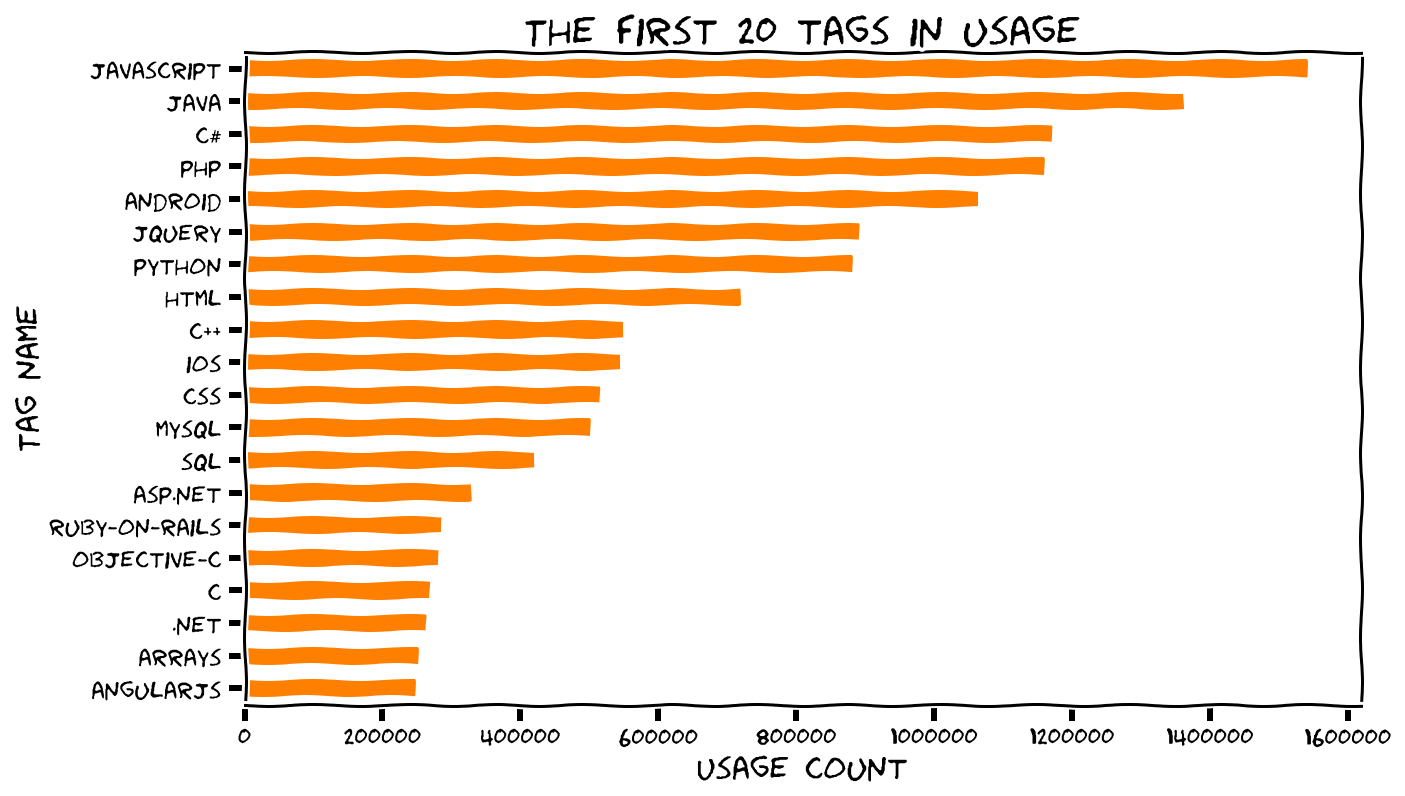

In [21]:
# Usage of the first 20 tags: bar plot

df.sort_values('count', ascending=False).head(20).plot('name', 'count', kind='barh', color=plot_color)
plt.title('The first 20 tags in usage')
plt.ylabel('Tag name')
plt.xlabel('Usage count')
plt.gca().invert_yaxis()
plt.legend().set_visible(False)
plt.xkcd()
plt.savefig('highest_20_tags.jpg')
plt.show();

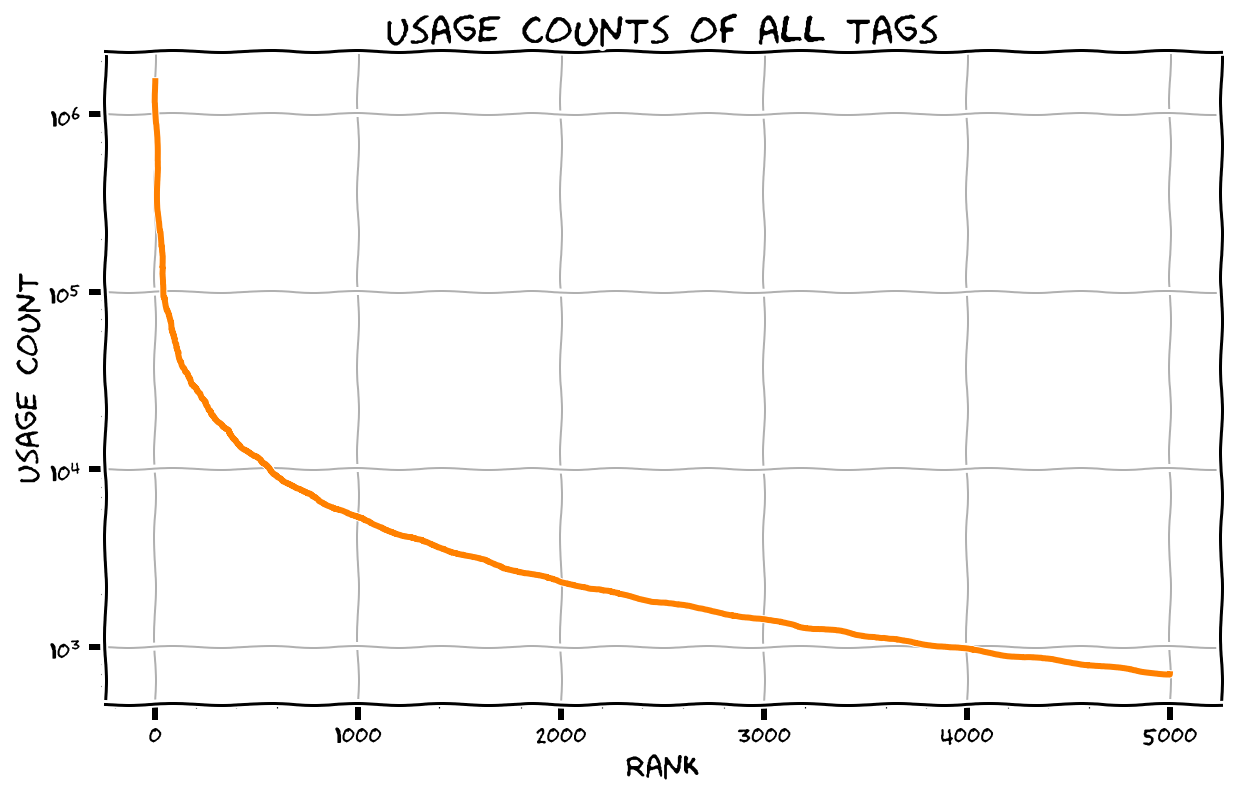

In [22]:
df_tmp = df.sort_values('count', ascending=False)

plt.xkcd()
plt.semilogy(range(df.count()['name']), df_tmp['count'], color=plot_color, lw=3)
plt.title('Usage counts of all tags')
plt.ylabel('Usage count')
plt.xlabel('Rank')
plt.grid(True, linewidth=1)
plt.minorticks_on()
plt.savefig('usage_time.jpg')
plt.show();

In [47]:
## Fit the frequency-rank data
# (fit the inner part as tail and head bend)

x = [i for i in range(df.head(1000).count()['name'])]
y = list(df.sort_values('count', ascending=False).head(1000)['count'])
p_fit = fit_powlaw(x, y, start=10)
print('Exponent is ', p_fit[0][1])

('Exponent is ', -0.96643917680760227)


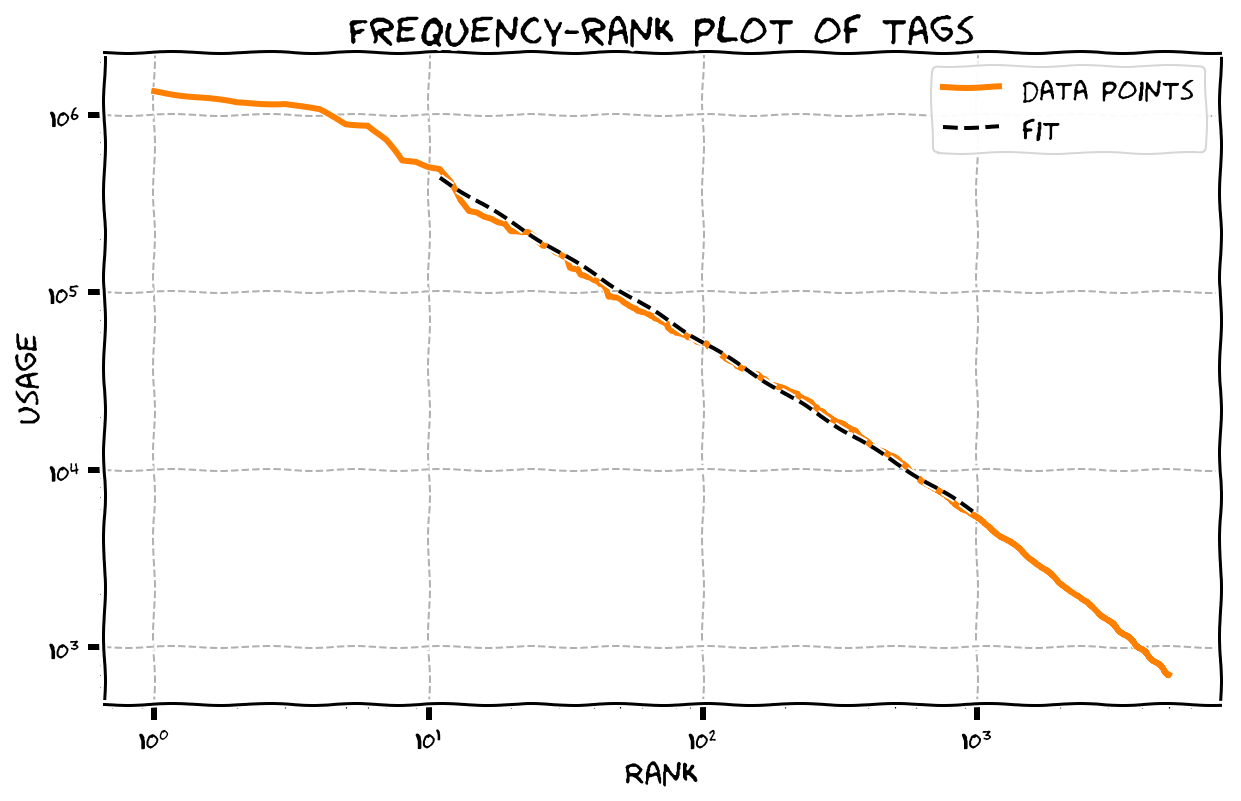

In [54]:
# Frequency-rank in log-log (Zipf), plus the fit

plt.loglog([i for i in range(df.count()['name'])], list(df.sort_values('count', ascending=False)['count']), 
           color=plot_color, label='data points', lw=3)
plt.loglog(x[11:], 10**p_fit[0][0] * x[11:]** p_fit[0][1], label='fit', color='k', linestyle='dashed')
plt.title('Frequency-rank plot of tags')
plt.xlabel('Rank')
plt.ylabel('Usage')
plt.xkcd()
plt.grid(True, linewidth=1, linestyle='dashed', zorder=0)
plt.legend()
plt.show();

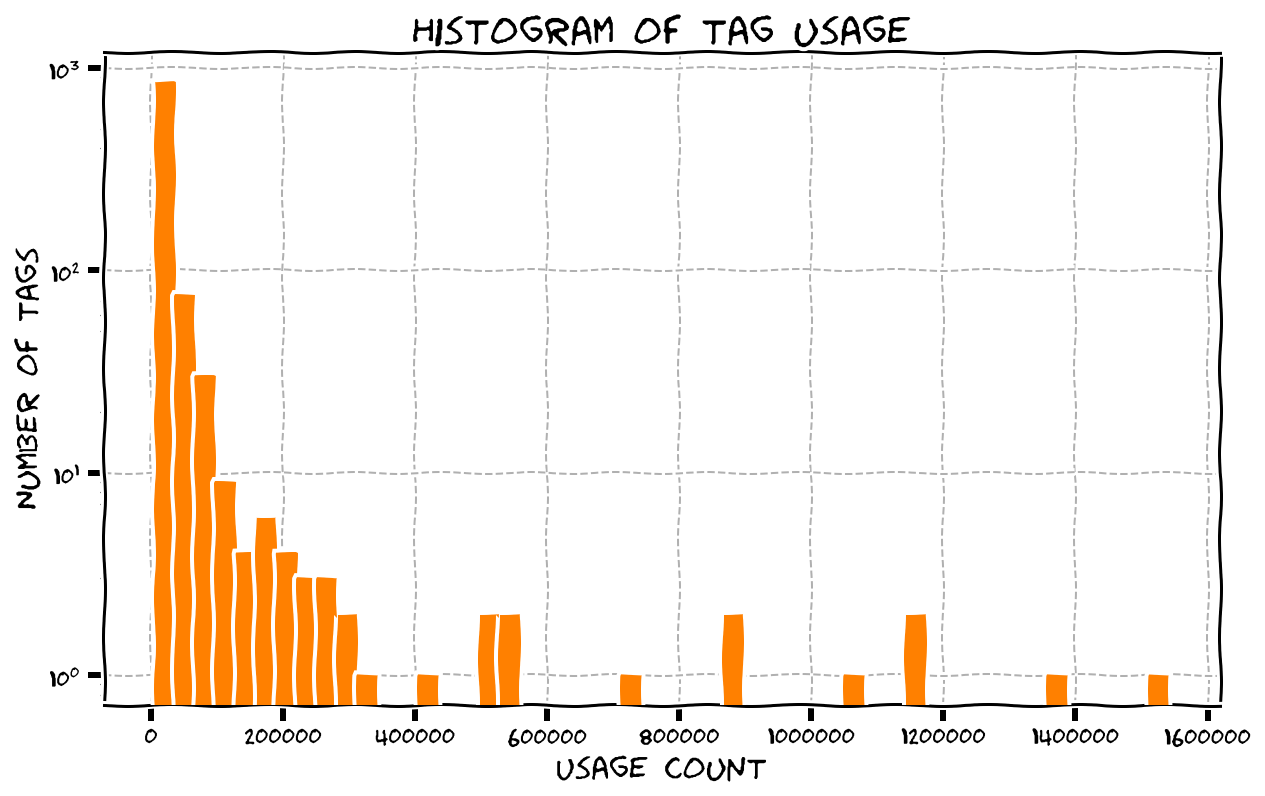

In [35]:
# Histogram usage of tags

df.hist('count', bins=50, log=True, color=plot_color, zorder=3)
plt.title('Histogram of tag usage')
plt.xlabel('Usage count')
plt.ylabel('Number of tags')
plt.xkcd()
plt.grid(True, linewidth=1, linestyle='dashed', zorder=0)
plt.show();

## Looking at the age of tags

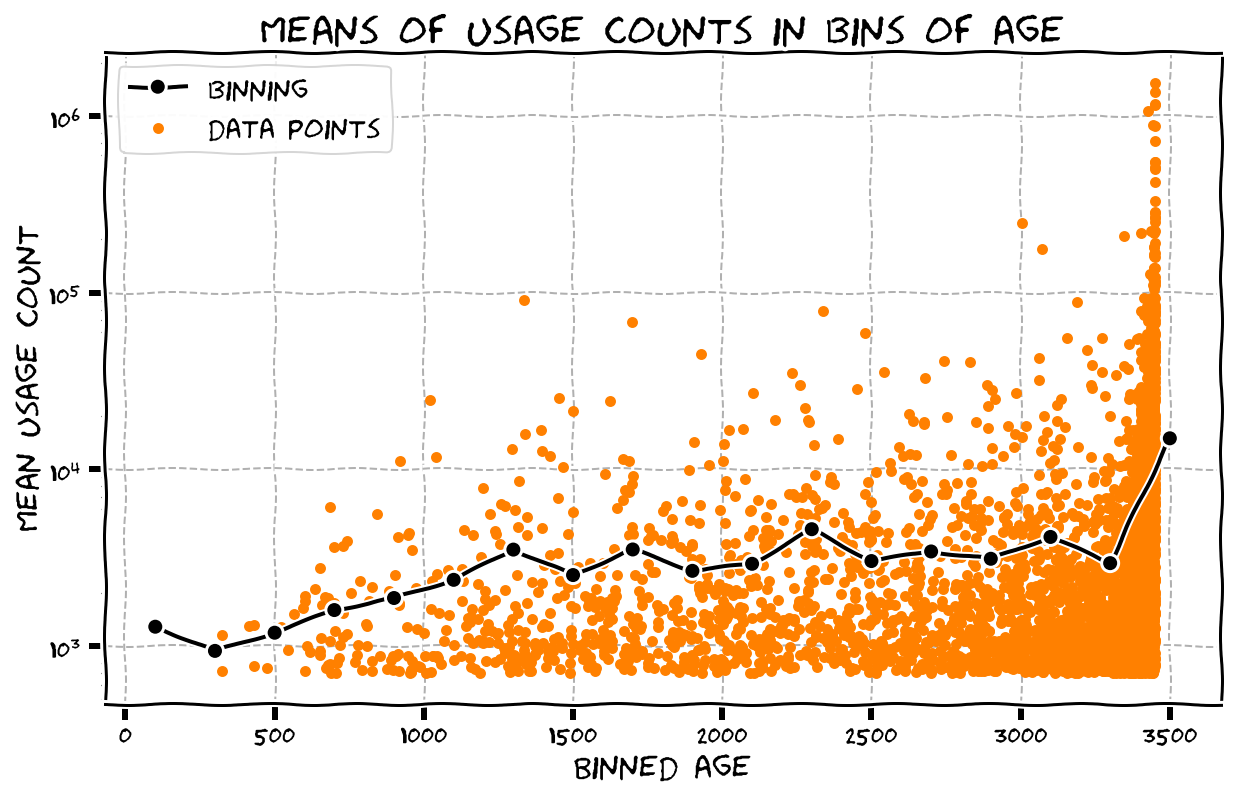

In [119]:
# Going to investigate the fact that the earliest tags seem so much higher than rest
# by binning usage counts and averaging

age_bin = 200

mids = [i+age_bin/2 for i in range(0, df['age'].max(), age_bin)]

mean_counts = []
std_counts = []
for i in range(0, df['age'].max(), age_bin):
    mean_counts.append(df[(df['age'] >= i) & (df['age'] < i + age_bin)]['count'].mean())
    std_counts.append(np.std(y[i:i+age_bin]))
    
df.plot('age', 'count', kind='scatter', color=plot_color, logy=True, zorder=3, label='data points')
plt.plot(mids, mean_counts, color='k', zorder=3, marker='o', label='binning')
plt.grid(True, linewidth=1, linestyle='dashed', zorder=0)
plt.title('Means of usage counts in bins of age')
plt.xlabel('Binned age')
plt.ylabel('Mean usage count')
plt.legend()
plt.show();

## How about the synonyms tags have?

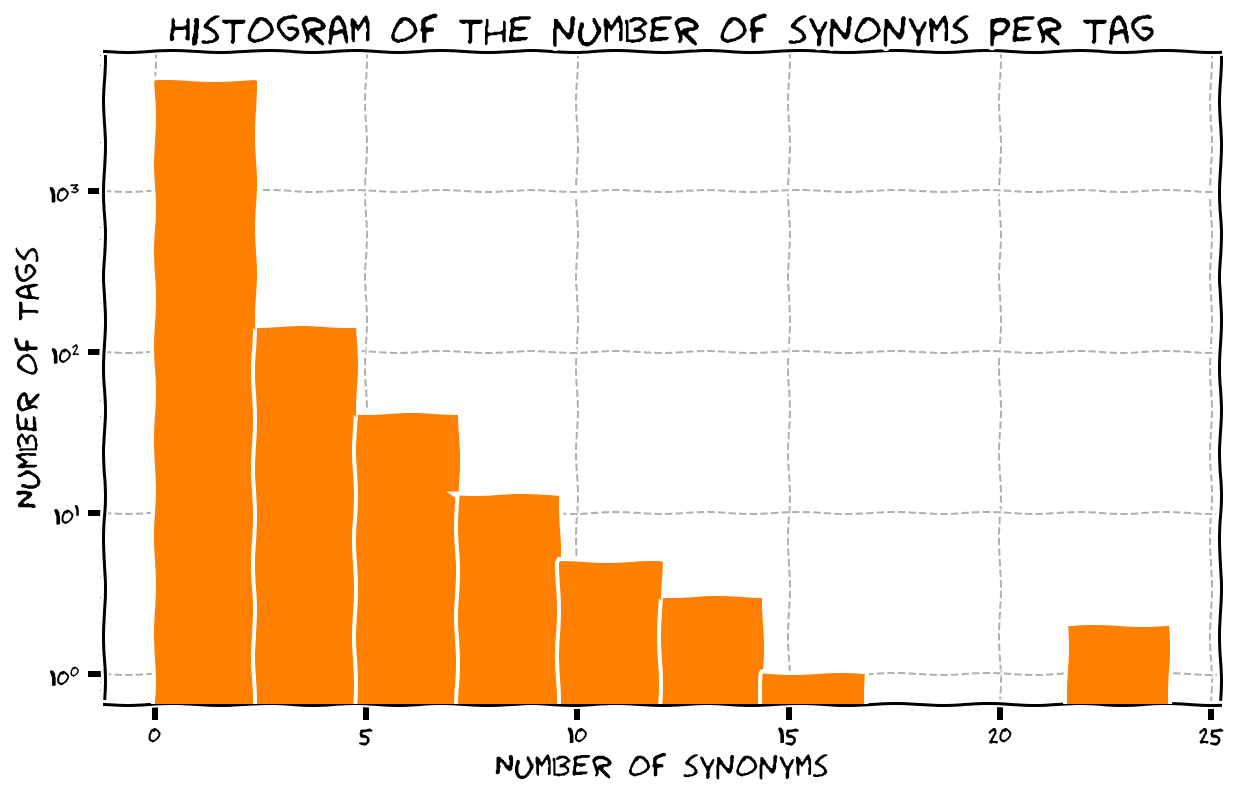

In [12]:
# Histogram num of synonyms

df.hist('num_synonyms', bins=10, log=True, color=plot_color, zorder=3)
plt.title('Histogram of the number of synonyms per tag')
plt.xlabel('Number of synonyms')
plt.ylabel('Number of tags')
plt.xkcd()
plt.grid(True, linewidth=1, linestyle='dashed', zorder=0)
plt.show();

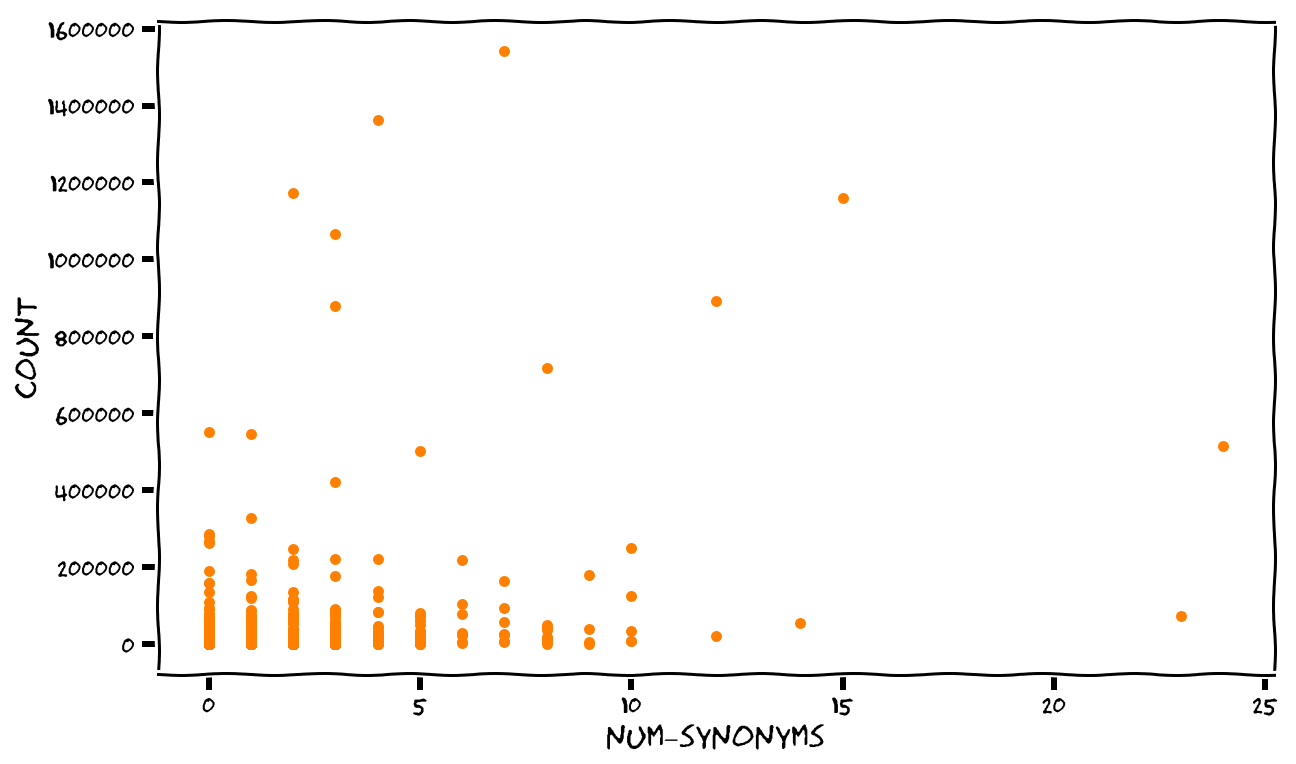

In [13]:
# Scatter usage count vs num of synonyms

df.plot('num_synonyms', 'count', kind='scatter', color=plot_color)

plt.xkcd()
plt.show();

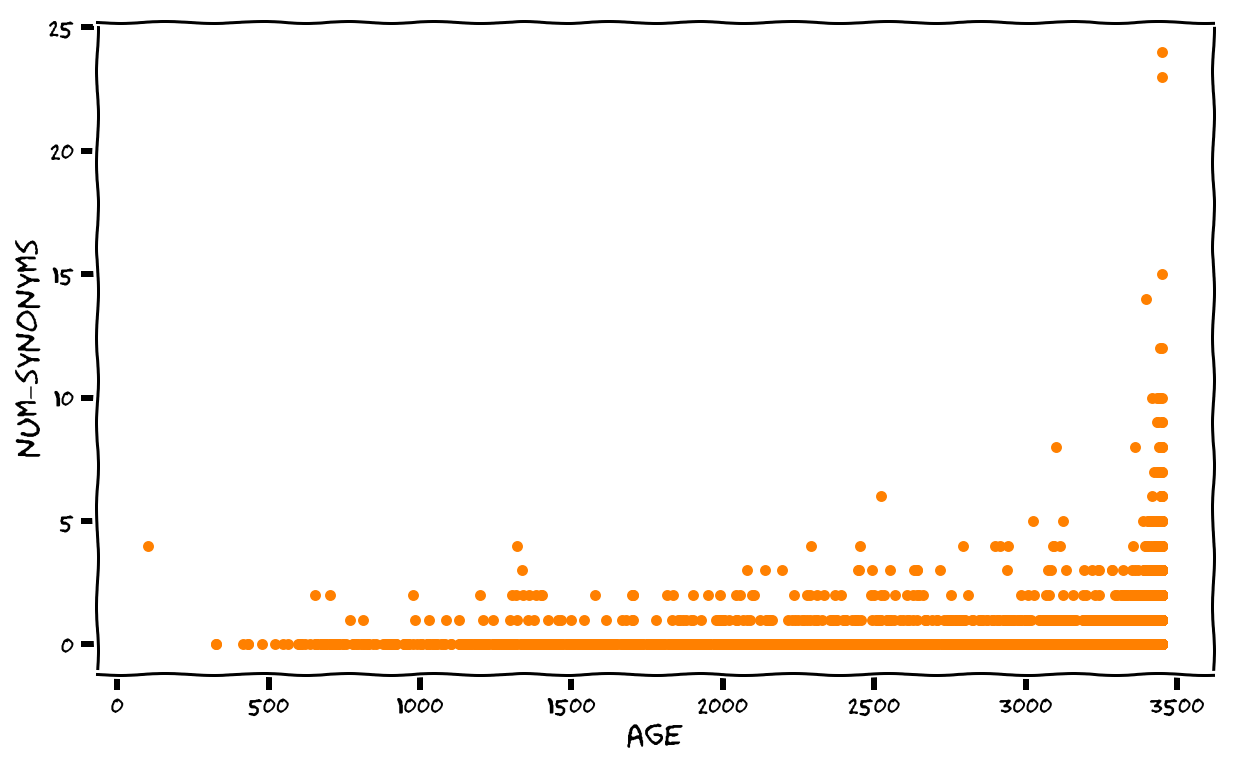

In [14]:
# Scatter age vs. num of synonyms

df.plot('age', 'num_synonyms', kind='scatter', color=plot_color)

plt.xkcd()
plt.show();

### Does having synonyms correspond to higher frequency of usage?

In [15]:
df.groupby('has_synonyms').mean()

,count,creation_date,is_moderator_only,is_required,age,num_synonyms
has_synonyms,,,,,,
0,3299.490949,1.256472e+09,0.0,0.0,3001.301700,0.000000
1,21529.908419,1.237581e+09,0.0,0.0,3219.937962,1.734121


In [18]:
# t-test to see if having synonyms leads to different counts of usage

syn = df[df['has_synonyms'] == 1]['count']
no_syn = df[df['has_synonyms'] == 0]['count']

stats.ttest_ind(syn, no_syn)

Ttest_indResult(statistic=11.428630156670451, pvalue=7.0493698456976785e-30)